In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews, acf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    733 non-null    object 
 1   20229   719 non-null    float64
 2   22314   730 non-null    float64
 3   22632   732 non-null    float64
 4   24028   506 non-null    float64
 5   24052   687 non-null    float64
 6   24309   661 non-null    float64
 7   24619   732 non-null    float64
 8   25021   307 non-null    float64
 9   26191   459 non-null    float64
 10  27213   428 non-null    float64
 11  28802   720 non-null    float64
 12  29146   717 non-null    float64
 13  30731   595 non-null    float64
 14  30862   552 non-null    float64
 15  30904   544 non-null    float64
 16  32407   715 non-null    float64
 17  33421   733 non-null    float64
 18  33495   652 non-null    float64
 19  34200   675 non-null    float64
 20  34399   688 non-null    float64
 21  34673   728 non-null    float64
 22  35

In [4]:
data

,Time,20229,22314,22632,24028,24052,24309,24619,25021,26191,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,2023-04-27 15:00:00,5.54,8.53,8.48,6.47,0.86,9.38,8.75,NaN,17.60,...,5.46,5.55,6.89,35.80,9.75,8.14,NaN,NaN,NaN,NaN
1,2023-04-28 03:00:00,6.01,8.89,9.42,3.02,2.19,8.51,9.35,NaN,12.40,...,5.96,7.53,6.18,19.40,11.20,9.41,NaN,NaN,NaN,NaN
2,2023-04-28 15:00:00,2.44,3.57,3.99,2.23,2.54,3.97,3.26,NaN,13.30,...,2.53,1.90,2.82,11.00,3.09,3.42,NaN,NaN,NaN,NaN
3,2023-04-29 03:00:00,1.34,2.08,2.14,1.07,1.33,1.07,2.51,NaN,4.83,...,2.80,1.69,1.11,4.39,1.87,2.24,NaN,NaN,NaN,NaN
4,2023-04-29 15:00:00,3.48,3.69,4.70,5.99,0.63,6.13,6.24,NaN,17.40,...,3.94,4.66,4.70,15.30,9.56,4.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2024-04-25 15:00:00,4.53,6.08,6.77,8.31,1.35,7.39,7.39,13.00,12.50,...,4.19,3.70,6.07,42.60,9.50,6.83,10.80,8.01,5.91,8.07
729,2024-04-26 03:00:00,5.97,8.36,9.51,5.90,1.89,8.06,10.10,11.20,14.40,...,5.27,5.08,7.67,14.10,9.21,8.80,12.80,8.06,7.20,7.88
730,2024-04-26 15:00:00,6.18,8.83,7.80,10.10,4.02,12.80,7.69,20.00,20.70,...,6.30,3.17,10.50,15.40,9.20,7.25,16.10,14.80,10.20,13.10
731,2024-04-27 03:00:00,4.89,7.09,7.77,6.59,2.97,8.73,8.41,15.80,9.09,...,5.81,3.51,6.87,15.30,7.99,7.18,12.00,10.30,8.39,8.86


In [5]:
df = data.interpolate(method='linear', limit_direction='forward', axis=0)
df = data.fillna(method='bfill')

In [6]:
df

,Time,20229,22314,22632,24028,24052,24309,24619,25021,26191,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,2023-04-27 15:00:00,5.54,8.53,8.48,6.47,0.86,9.38,8.75,6.75,17.60,...,5.46,5.55,6.89,35.80,9.75,8.14,3.88,6.01,10.10,5.47
1,2023-04-28 03:00:00,6.01,8.89,9.42,3.02,2.19,8.51,9.35,6.75,12.40,...,5.96,7.53,6.18,19.40,11.20,9.41,3.88,6.01,10.10,5.47
2,2023-04-28 15:00:00,2.44,3.57,3.99,2.23,2.54,3.97,3.26,6.75,13.30,...,2.53,1.90,2.82,11.00,3.09,3.42,3.88,6.01,10.10,5.47
3,2023-04-29 03:00:00,1.34,2.08,2.14,1.07,1.33,1.07,2.51,6.75,4.83,...,2.80,1.69,1.11,4.39,1.87,2.24,3.88,6.01,10.10,5.47
4,2023-04-29 15:00:00,3.48,3.69,4.70,5.99,0.63,6.13,6.24,6.75,17.40,...,3.94,4.66,4.70,15.30,9.56,4.04,3.88,6.01,10.10,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2024-04-25 15:00:00,4.53,6.08,6.77,8.31,1.35,7.39,7.39,13.00,12.50,...,4.19,3.70,6.07,42.60,9.50,6.83,10.80,8.01,5.91,8.07
729,2024-04-26 03:00:00,5.97,8.36,9.51,5.90,1.89,8.06,10.10,11.20,14.40,...,5.27,5.08,7.67,14.10,9.21,8.80,12.80,8.06,7.20,7.88
730,2024-04-26 15:00:00,6.18,8.83,7.80,10.10,4.02,12.80,7.69,20.00,20.70,...,6.30,3.17,10.50,15.40,9.20,7.25,16.10,14.80,10.20,13.10
731,2024-04-27 03:00:00,4.89,7.09,7.77,6.59,2.97,8.73,8.41,15.80,9.09,...,5.81,3.51,6.87,15.30,7.99,7.18,12.00,10.30,8.39,8.86


In [7]:
for column in df.columns[1:]:
    temp_column = df[column].copy() 
    transformed_values, _ = boxcox(temp_column)  
    df[column] = transformed_values 

df.head()

,Time,20229,22314,22632,24028,24052,24309,24619,25021,26191,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,2023-04-27 15:00:00,1.758279,2.387542,2.424558,1.399577,-0.152003,2.796296,2.763008,2.372575,3.345713,...,1.886367,2.079485,2.221314,3.407631,2.938891,2.238120,1.44893,2.513172,5.548347,2.179326
1,2023-04-28 03:00:00,1.844260,2.438737,2.559923,0.928447,0.753032,2.648117,2.869456,2.372575,2.881250,...,1.994770,2.538605,2.079269,2.847642,3.168646,2.403815,1.44893,2.513172,5.548347,2.179326
2,2023-04-28 15:00:00,0.904456,1.356043,1.500436,0.705955,0.888733,1.578362,1.345278,2.372575,2.972819,...,0.982921,0.689127,1.117159,2.320577,1.276932,1.277374,1.44893,2.513172,5.548347,2.179326
3,2023-04-29 03:00:00,0.294002,0.759520,0.795213,0.066920,0.281023,0.068100,1.017562,2.372575,1.712317,...,1.097210,0.556048,0.105139,1.449655,0.670060,0.826829,1.44893,2.513172,5.548347,2.179326
4,2023-04-29 15:00:00,1.271471,1.393595,1.694399,1.357042,-0.473228,2.168626,2.243354,2.372575,3.330285,...,1.492776,1.829955,1.731297,2.628091,2.906831,1.458002,1.44893,2.513172,5.548347,2.179326


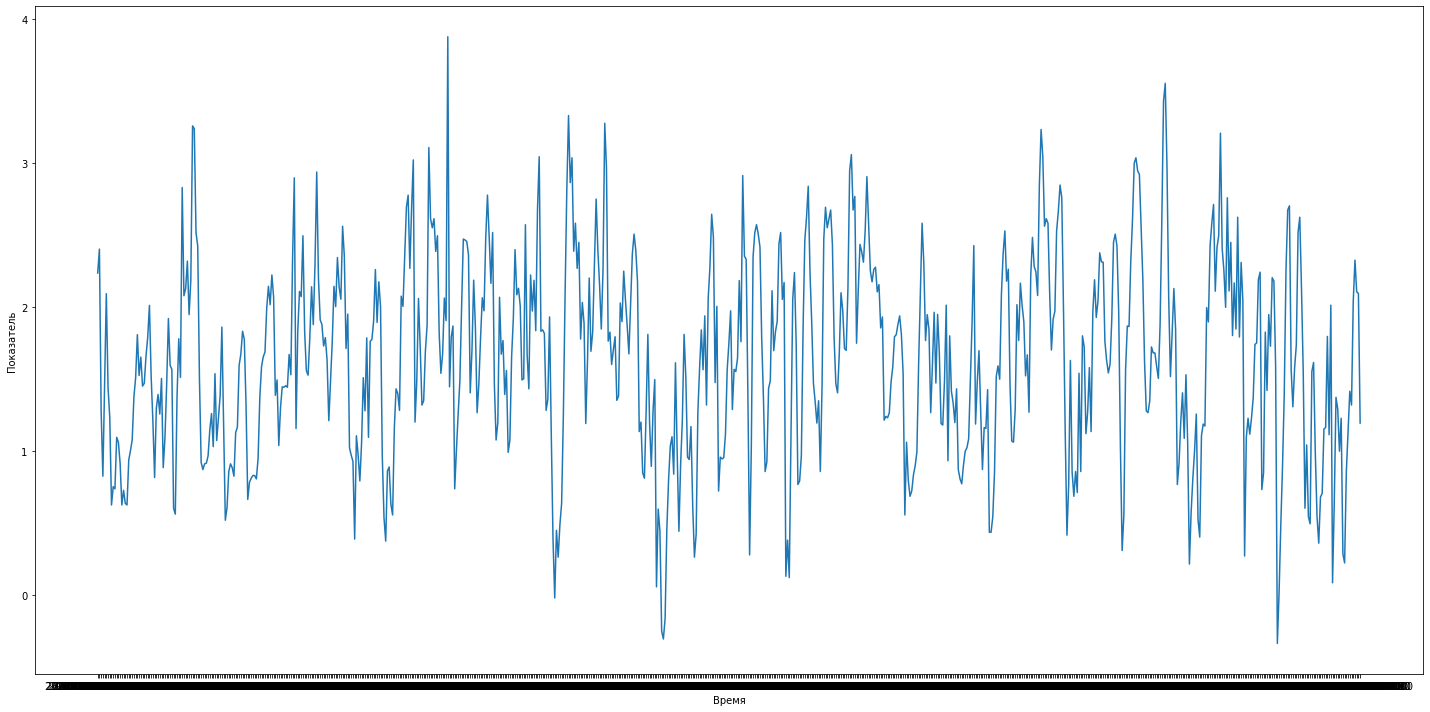

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(df['Time'], df['80381'])
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.tight_layout()
plt.show()

In [9]:
result = adfuller(df["80381"])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = kpss(df["80381"])
    
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
    
za_results = zivot_andrews(df["80381"])

print('Zivot-Andrews Statistic:', za_results[0])
print('p-value:', za_results[1])
print('Breakpoint:', za_results[2])

ADF Statistic: -10.538951239467782
p-value: 8.751256669313353e-19
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
KPSS Statistic: 0.1108201587100099
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Zivot-Andrews Statistic: -10.738009987972735
p-value: 1e-05
Breakpoint: {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618}


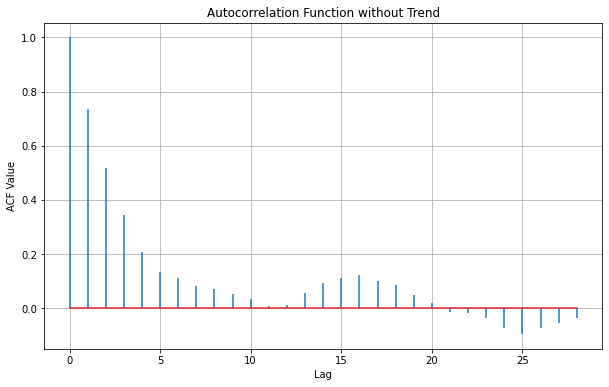

In [10]:
#автокор
acf_values = acf(df["80381"], fft=False)

#лаги
num_lags = len(acf_values) - 1


plt.figure(figsize=(10, 6))
plt.stem(np.arange(num_lags+1), acf_values, markerfmt=' ')
plt.title('Autocorrelation Function without Trend')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.grid(True)
plt.show()

In [11]:
df = df.drop(data.columns[0], axis=1)

In [12]:
df

,20229,22314,22632,24028,24052,24309,24619,25021,26191,27213,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,1.758279,2.387542,2.424558,1.399577,-0.152003,2.796296,2.763008,2.372575,3.345713,2.775276,...,1.886367,2.079485,2.221314,3.407631,2.938891,0.046369,1.448930,2.513172,5.548347,2.179326
1,1.844260,2.438737,2.559923,0.928447,0.753032,2.648117,2.869456,2.372575,2.881250,2.816349,...,1.994770,2.538605,2.079269,2.847642,3.168646,0.049801,1.448930,2.513172,5.548347,2.179326
2,0.904456,1.356043,1.500436,0.705955,0.888733,1.578362,1.345278,2.372575,2.972819,1.447966,...,0.982921,0.689127,1.117159,2.320577,1.276932,0.026464,1.448930,2.513172,5.548347,2.179326
3,0.294002,0.759520,0.795213,0.066920,0.281023,0.068100,1.017562,2.372575,1.712317,1.048935,...,1.097210,0.556048,0.105139,1.449655,0.670060,0.017130,1.448930,2.513172,5.548347,2.179326
4,1.271471,1.393595,1.694399,1.357042,-0.473228,2.168626,2.243354,2.372575,3.330285,2.043033,...,1.492776,1.829955,1.731297,2.628091,2.906831,0.030206,1.448930,2.513172,5.548347,2.179326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,1.546688,1.975997,2.140034,1.530556,0.295505,2.438153,2.498634,3.445024,2.891713,2.330420,...,1.565794,1.514898,2.056023,3.564872,2.896603,0.042255,2.676234,3.087329,3.421205,2.842535
729,1.837201,2.362686,2.572248,1.348562,0.616118,2.566608,2.995221,3.187416,3.077485,2.921188,...,1.842877,1.951963,2.363560,2.552228,2.846441,0.048211,2.891963,3.100431,4.117448,2.799779
730,1.873763,2.430336,2.318093,1.625503,1.296018,3.288497,2.560050,4.238870,3.566729,2.657521,...,2.064010,1.312479,2.792830,2.634134,2.844689,0.043649,3.188901,4.530993,5.595068,3.777138
731,1.626923,2.161088,2.313209,1.409561,1.029646,2.686704,2.700118,3.795188,2.483439,2.635039,...,1.963115,1.445105,2.217489,2.628091,2.620756,0.043422,2.809597,3.640621,4.724029,3.012926


In [13]:
from statsmodels.tsa.arima.model import ARIMA

for column in df.columns:
    series = df[column]
    model = ARIMA(series, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast()
    
    restored_forecast = inv_boxcox(forecast, 0)
    print(f"Прогноз для столбца {column} (обратное преобразование): {restored_forecast}")


Прогноз для столбца 20229 (обратное преобразование): 733    1.821456
dtype: float64
Прогноз для столбца 22314 (обратное преобразование): 733    3.134955
dtype: float64
Прогноз для столбца 22632 (обратное преобразование): 733    3.605008
dtype: float64
Прогноз для столбца 24028 (обратное преобразование): 733    2.001522
dtype: float64
Прогноз для столбца 24052 (обратное преобразование): 733    2.001872
dtype: float64
Прогноз для столбца 24309 (обратное преобразование): 733    2.531039
dtype: float64
Прогноз для столбца 24619 (обратное преобразование): 733    5.292751
dtype: float64
Прогноз для столбца 25021 (обратное преобразование): 733    6.363439
dtype: float64
Прогноз для столбца 26191 (обратное преобразование): 733    5.671594
dtype: float64
Прогноз для столбца 27213 (обратное преобразование): 733    4.551946
dtype: float64
Прогноз для столбца 28802 (обратное преобразование): 733    6.539334
dtype: float64
Прогноз для столбца 29146 (обратное преобразование): 733    5.07518
dtype: f

In [14]:
forecast_df = pd.DataFrame()

for column in df.columns:
    series = df[column]
    model = ARIMA(series, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast()
       
    restored_forecast = inv_boxcox(forecast, 0)  
    forecast_df[column] = restored_forecast

forecast_df

,20229,22314,22632,24028,24052,24309,24619,25021,26191,27213,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
733,1.821456,3.134955,3.605008,2.001522,2.001872,2.531039,5.292751,6.363439,5.671594,4.551946,...,2.864947,1.945983,2.71286,6.218161,4.246488,1.025131,4.184814,2.26457,5.349572,2.594808


In [15]:
data_hist_predict = pd.concat([data, forecast_df], ignore_index=True)
data_hist_predict

,Time,20229,22314,22632,24028,24052,24309,24619,25021,26191,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,2023-04-27 15:00:00,5.540000,8.530000,8.480000,6.470000,0.860000,9.380000,8.750000,NaN,17.600000,...,5.460000,5.550000,6.89000,35.800000,9.750000,8.140000,NaN,NaN,NaN,NaN
1,2023-04-28 03:00:00,6.010000,8.890000,9.420000,3.020000,2.190000,8.510000,9.350000,NaN,12.400000,...,5.960000,7.530000,6.18000,19.400000,11.200000,9.410000,NaN,NaN,NaN,NaN
2,2023-04-28 15:00:00,2.440000,3.570000,3.990000,2.230000,2.540000,3.970000,3.260000,NaN,13.300000,...,2.530000,1.900000,2.82000,11.000000,3.090000,3.420000,NaN,NaN,NaN,NaN
3,2023-04-29 03:00:00,1.340000,2.080000,2.140000,1.070000,1.330000,1.070000,2.510000,NaN,4.830000,...,2.800000,1.690000,1.11000,4.390000,1.870000,2.240000,NaN,NaN,NaN,NaN
4,2023-04-29 15:00:00,3.480000,3.690000,4.700000,5.990000,0.630000,6.130000,6.240000,NaN,17.400000,...,3.940000,4.660000,4.70000,15.300000,9.560000,4.040000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,2024-04-26 03:00:00,5.970000,8.360000,9.510000,5.900000,1.890000,8.060000,10.100000,11.200000,14.400000,...,5.270000,5.080000,7.67000,14.100000,9.210000,8.800000,12.800000,8.06000,7.200000,7.880000
730,2024-04-26 15:00:00,6.180000,8.830000,7.800000,10.100000,4.020000,12.800000,7.690000,20.000000,20.700000,...,6.300000,3.170000,10.50000,15.400000,9.200000,7.250000,16.100000,14.80000,10.200000,13.100000
731,2024-04-27 03:00:00,4.890000,7.090000,7.770000,6.590000,2.970000,8.730000,8.410000,15.800000,9.090000,...,5.810000,3.510000,6.87000,15.300000,7.990000,7.180000,12.000000,10.30000,8.390000,8.860000
732,2024-04-27 15:00:00,1.870000,3.020000,3.350000,1.560000,1.950000,2.480000,3.990000,2.850000,5.120000,...,2.830000,1.820000,2.55000,3.830000,3.470000,3.170000,3.570000,2.09000,2.880000,2.010000


In [16]:
data_hist_predict.to_csv("data_hist_predict.csv")

In [17]:
merged_df = pd.read_csv('data_hist_predict.csv')

json_data = merged_df.to_json(orient='records')

with open('merged_table.json', 'w') as f:
    f.write(json_data)

In [18]:
import json

# Чтение первого JSON файла
with open('lat_lon.json', 'r') as f:
    data1 = json.load(f)

# Чтение второго JSON файла
with open('merged_table.json', 'r') as f:
    data2 = json.load(f)

# Создание словаря для хранения положений (широты и долготы) датчиков
positions = {}

# Обработка первого JSON файла
for sensor_id, position_data in data1.items():
    positions[sensor_id] = position_data

# Обработка второго JSON файла
for item in data2:
    time = item['Time']
    for key, value in item.items():
        if key != 'Unnamed: 0' and key != 'Time':
            if value is not None:
                if key in positions:
                    if 'measurements' not in positions[key]:
                        positions[key]['measurements'] = []
                    positions[key]['measurements'].append({'time': time, 'value': value})

# Сохранение результата в новый JSON файл
with open('merged_data.json', 'w') as f:
    json.dump(positions, f, indent=4)
